# Part II - (Effect Of Age On Duration Of Bike Rides Of Ford GoBike Users)
## by (Jude Nyamekye Koomson)

## Investigation Overview


>In this investigation, I wanted to look at the characteristics of users who patronise the bike service that could be used to make data-driven decision in targeting  several groups of people for increase in business profits. The main focus will be based on these questions:
>> - Who are the user_types?
>> - What variable(s) can predict an increase in business profits if business strategies are made to explore them?.


## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
> There are 183412 entries in the dataset with 16 features(columns) namley:(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)
> There were missing data in the dataset : start_station_id - 197, start_station_name - 197, end_station_id - 197, end_station_name - 197, member_birth_year - 8265, member_gender - 8265

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
def label(x,y,t):
    """
    Args:
    x (str): x-axis
    y (str): y-axis
    t (str): main title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()
   
  

In [5]:
# choosing a  color for seaborn my plots
base_color = sb.color_palette()[0]

sb.set()

In [7]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('fordgobike-tripdata.csv')
df_cp = df.copy()

In [9]:
#
df_cp = df_cp.dropna(axis=0)
df_cp['member_birth_year'] = df_cp['member_birth_year'].astype('int')
df_cp['age_of_member'] = df_cp.apply(lambda x: 2019 - x['member_birth_year'], axis = 1)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# Who Are The Users?

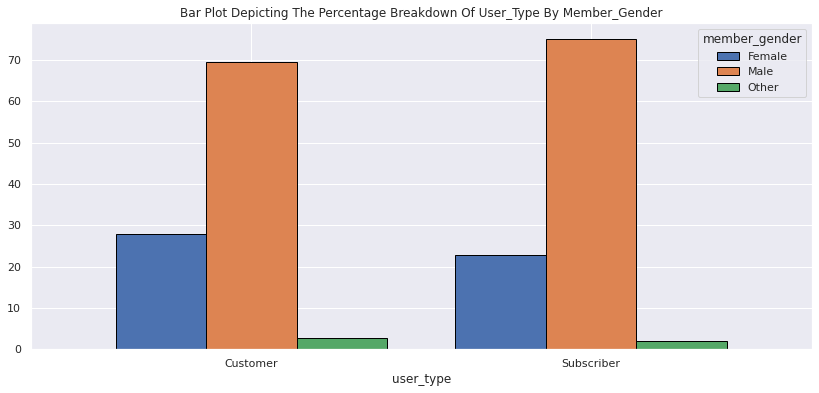

In [10]:
df_cp.groupby('user_type')['member_gender'].value_counts(normalize=True).unstack().mul(100).plot.bar(edgecolor='black', figsize=[14,6], rot=0, width=0.8);
plt.title('Bar plot depicting the percentage breakdown of user_type by member_gender'.title());

## Description Of User Types

> - From our exploratory analysis, we found that the users (type of users) of Ford GoBike System are mainly `Customers` and `Subscribers`. 
> - From the bar graph plot, Subscriber user_type recored the highest frequency count, followed by Customer user_type. Figuratively, Subscriber user_type and Customer user_type recorded 163,544 counts and 19,868 counts respectively.
> - The user-types of Ford GoBike were mainly Customers and Subscribers.

## Age Distributions Of User Types

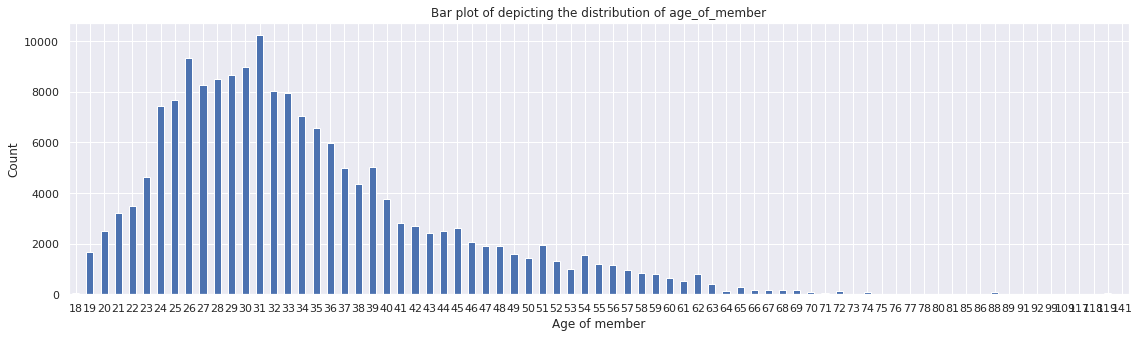

In [11]:
# getting visualization of 'age_of_member' using matplotliib
age_of_member = df_cp['age_of_member'].value_counts().sort_index()
age_of_member.plot(kind='bar', figsize=(19,5), rot=0)
label('Age of member', 'Count', 'Bar plot of depicting the distribution of age_of_member');

## Description of Age Distributions Of User Types

> The data visualized in histogram graphically was observed to be skewed to the left. This implies that majority of the users of Ford Bike System are people with ages less than 50 years.
> From the graph plot from the data, age 31 was identified as the age with highest count among users, followed by ages 26, 30, 29, 28, to mention but a few respectively.

## What gender type uses the Ford Go Bikes?

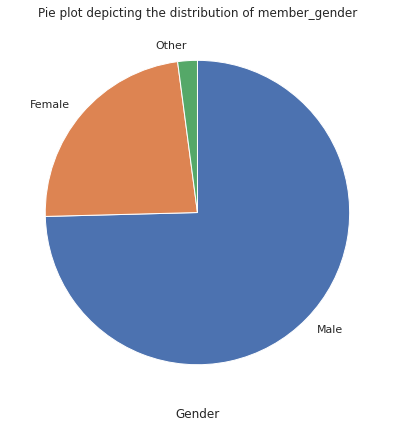

In [14]:
sorted_counts = df_cp['member_gender'].value_counts()
plt.figure(figsize=[10,7])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False)
label('Gender','', 'Pie plot depicting the distribution of member_gender');

## Description of Gender Types
> - From the plot, you can easily identify which gender type mostly uses the ford go bike.
> - The `male` gender is the highest or majority of users followed by `female` and `other` respectively 

## Distribution nature between Member Gender and Age of Member

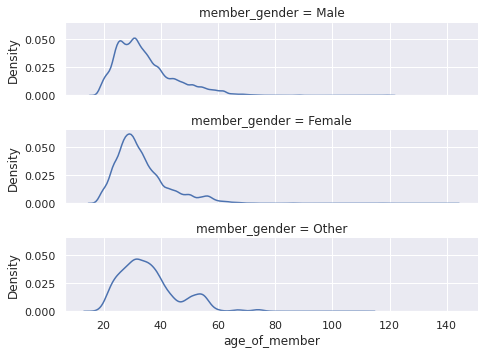

In [17]:
ordered_type = df_cp.member_gender.value_counts().index
g = sb.FacetGrid(df_cp, row="member_gender", row_order=ordered_type,
                  height=1.7, aspect=4,)
g.map(sb.kdeplot, "age_of_member");

## Description

> - From the plots we identify that the female gender has the highest youngest age followed by male and other respectively. Since most age of the users are people ranging from 20 to 80.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [26]:
!jupyter nbconvert Part_II_Project3.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Project3.ipynb to slides
[NbConvertApp] Writing 702513 bytes to Part_II_Project3.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Project3.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 